<a href="https://colab.research.google.com/github/Rajadhurairajendhiran123/ATS_useing_SentenceTransformer/blob/main/ATS_useing_SentenceTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 76.1 MB/s eta 0:00:00


Enter the path to the resume PDF: /content/isro cource.pdf
Enter the job description: /content/isro cource.pdf
Resume Fitment Score: 5.989999771118164%


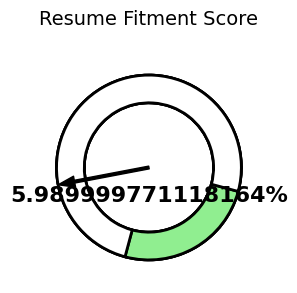

In [9]:
import os
import fitz  # PyMuPDF
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load SentenceTransformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text.strip()

def compute_similarity(resume_text, job_desc):
    """Compute cosine similarity between resume text and job description."""
    embeddings = model.encode([resume_text, job_desc])
    similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
    return round(similarity[0][0] * 100, 2)

def visualize_score(score):
    """Visualize similarity score as a gauge."""
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis("off")

    # Draw gauge
    wedgeprops = {"width": 0.3, "edgecolor": "black", "linewidth": 2}
    colors = ["#FF4C4C", "#FFA500", "#90EE90"]
    thresholds = [0, 50, 75, 100]
    labels = ["Low", "Medium", "High"]

    for i in range(3):
        ax.pie([thresholds[i+1] - thresholds[i], 100 - (thresholds[i+1] - thresholds[i])],
               radius=1, startangle=180 + thresholds[i],
               colors=[colors[i], "white"], wedgeprops=wedgeprops)

    # Plot needle
    needle_angle = 180 + (score * 1.8)
    ax.annotate('', xy=(np.cos(np.radians(needle_angle)), np.sin(np.radians(needle_angle))),
                xytext=(0, 0), arrowprops=dict(facecolor='black', width=2, headwidth=8))

    # Add center score text
    ax.text(0, -0.3, f"{score}%", ha='center', va='center', fontsize=16, fontweight='bold')
    ax.set_title("Resume Fitment Score", fontsize=14, pad=20)
    plt.show()

def main():
    """Main function to process PDF and compute similarity."""
    pdf_path = input("Enter the path to the resume PDF: ")
    if not os.path.exists(pdf_path):
        print("Error: File not found.")
        return

    job_desc = input("Enter the job description: ").strip()
    if not job_desc:
        print("Error: Job description cannot be empty.")
        return

    resume_text = extract_text_from_pdf(pdf_path)
    score = compute_similarity(resume_text, job_desc)

    print(f"Resume Fitment Score: {score}%")
    visualize_score(score)

if __name__ == "__main__":
    main()
